# Predicting Diabetic Patients Readmission

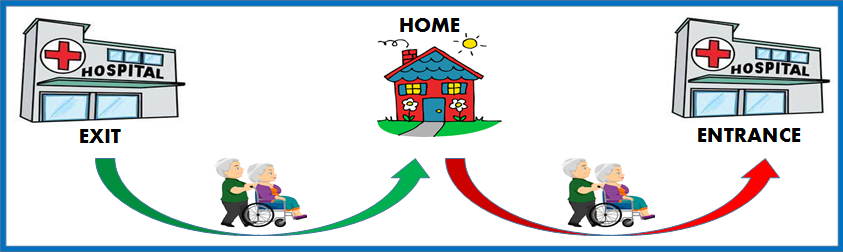

# Table of Contents
- [Introduction](#Introduction)
- [Data Preparation](#Data-Preparation)
- [Feature Engineering](#Feature-Engineering)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Statistical Testing](#Statistical-Testing)
- [Model Training and Evaluation](#Model-Training-and-Evaluation)
- [Model Deployment](#Model-Deployment)
- [Conclusion](#Conclusion)
- [References](#References)


## Introduction

Diabetes is a significant public health challenge, affecting millions globally and leading to substantial healthcare costs due to complications and hospital readmissions. According to the CDC, approximately 34.2 million people in the United States are diagnosed with diabetes, representing about 10.5% of the population.  In Nigeria, the prevalence of diabetes has been rising sharply, with estimates indicating that around 5.7% of the adult population is affected, translating to approximately 4.7 million cases as of 2015 [1](https://bmjopen.bmj.com/content/7/5/e015424) [4](https://www.frontiersin.org/journals/public-health/articles/10.3389/fpubh.2021.762429/full). The economic burden associated with diabetes in Nigeria is profound, exacerbated by limited access to healthcare services and a high rate of undiagnosed cases, which is estimated to be around two-thirds of the diabetic population [2](https://brieflands.com/articles/jjcdc-105702) [3](https://www.talabidiabetescenter.org/page-diabetes-in-nigeria.html)

Hospital readmission is situation where a patient was discharged from the hospital and is admitted again for the same or related care within a specified time period, such as 30, 60, or 90 days. 

Hospital readmissions within 30 days of discharge are particularly concerning for diabetic patients, as they often indicate poor disease management and can lead to increased morbidity and healthcare costs. Recent studies have shown that various factors contribute to the risk of readmission, including comorbidities, previous admissions, and social determinants of health41. Understanding these factors is crucial for developing targeted interventions aimed at reducing readmission rates.

#### Machine Learning in Healthcare

In recent years, machine learning (ML) has emerged as a powerful tool for predicting hospital readmissions among diabetic patients. Various algorithms, including `Random Forest (RF)`, `Naive Bayes`, and `deep learning` models like `Long Short-Term Memory (LSTM)`, have been employed to analyze electronic health records (EHRs) and identify patients at high risk of readmission. For instance, studies have demonstrated that the RF model consistently outperforms traditional classifiers in predicting 30-day readmission rates, achieving higher accuracy metrics such as the area under the receiver operating characteristic curve (AUC)23.
Moreover, integrating advanced modeling techniques with comprehensive feature selection enhances predictive accuracy and enables healthcare providers to allocate resources more effectively. By identifying high-risk patients early, healthcare systems can implement preventive measures that may significantly reduce unnecessary readmissions

#### Data Collection
The dataset for this project on predicting diabetic patient readmissions was downloaded from [Kaggle](https://www.kaggle.com/datasets/brandao/diabetes/data?select=description.pdf)

### Project Objective and Goals

__Objective:__ The objective of this project is to build a predictive model for hospital readmissions based on patient demographics, medical history, and discharge conditions.

__Goals:__

1. Determine the key factors or variables that are significantly associated with higher readmission rates
2. Identify high-risk patients who might benefit from targeted interventions to reduce readmissions.

### Import necessary libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Setting up plot style
plt.style.use('seaborn-darkgrid')

C:\Users\user\AppData\Local\Temp\ipykernel_10544\3802337101.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data Preparation

### 1. Data Cleaning

In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


##### 1. Data Type

In [4]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [5]:
# Convert to categorical type
df['admission_type_id'] = df['admission_type_id'].astype('category')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('category')
df['admission_source_id'] = df['admission_source_id'].astype('category')

In [6]:
df.dtypes

encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                           object
weight                        object
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital               int64
payer_code                    object
medical_specialty             object
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                     object
metformin                     object
repaglinide                   object
nateglinide                   object
c

In [7]:
# Check for missing values

df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

As shown above, we see that only two columns has missing values, but reading the dataset description shows that's not true. There are columns with __"`?`"__ that are recognized as actual values which we need to replace with NaN

In [8]:
# Now we will replace "?" with NaN for other columns
df.replace("?", np.nan, inplace=True)

In [9]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Now we can see actual missing values in our dataset and they are formatted as `?`. So the next step would be to deal with these missing values adequately, but first let's see what percentage of our dataset are missing data, that will guide us on the appropriate decision on how to deal with them.

In [10]:
# Check for the percentage of missing values

missing_percentage = df.isnull().mean() * 100

# Display the result
print(missing_percentage)

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

Above the following columns has the following percenatage of missing values:

* `race`: 2.23% 
* `weight`: 96.85%
* `payer_code`: 39.55%
* `medical_specialty`: 49.08%
* `diag_1`: 0.02%
* `diag_2`: 0.35%
* `diag_3`: 1.39%
* `max_glu_serum`: 94.74%
* `A1Cresult`: 83.27%


The next course of action is to effectively deal with this missing values. Therefore, we will drop every column that has missing values above 30% as well as those with less than 2%. Additionaly, we will '`Encounter ID'` and keep the `'Patient number'` because patient number is unique while some patients in the dataset may had more than one encounters .

#### Drop Columns

In [11]:
columns_to_drop = ['encounter_id', 'weight','payer_code','medical_specialty', 'max_glu_serum', 'A1Cresult']

df = df.drop(columns_to_drop, axis=1)


In [12]:
df.isnull().sum()

patient_nbr                    0
race                        2273
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
miglitol  

#### Fill missing values in race column as Other

In [13]:
df['race'].value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [14]:
# Replace NaN with 'Other' in the 'race' column
df['race'] = df['race'].apply(lambda x: 'Other' if pd.isna(x) else x)

In [15]:
df['race'].value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: count, dtype: int64

In [16]:
# Drop rows with NaN values in diag_1, diag_2, or diag_3 only
df = df.dropna(subset=['diag_1', 'diag_2', 'diag_3'])
df.isnull().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide   

In [17]:
df['gender'].value_counts()

gender
Female             53922
Male               46319
Unknown/Invalid        3
Name: count, dtype: int64

In [18]:
# Remove rows with "Unknown/Invalid" in the 'gender' column
df = df[df['gender'] != 'Unknown/Invalid']

In [19]:
df[['citoglipton', 'examide']].value_counts()

citoglipton  examide
No           No         100241
Name: count, dtype: int64

As indicated above, this two variables '`citoglipton`', and '`examide`' are drugs and all records have the same value  of '`No`' which means they were not prescribed for the patient. So essentially these cannot provide any interpretive or discriminatory information for predicting readmission so we decided to drop these two variables below

In [20]:
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [21]:
# Check for duplicate rows

duplicates = df.duplicated()
df[duplicates]

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


Our dataset now has no missing values and no duplicated data

#### Collapse Variables Admission type and Discharge disposition

__Admission type__

In [22]:
# Rename admission_type_id and discharge_disposition_id to admission_type and discharge_disposition respectively

df = df.rename(columns={'admission_type_id': 'admission_type', 
                        'discharge_disposition_id': 'discharge_disposition',
                        'admission_source_id': 'admission_source'
                       })


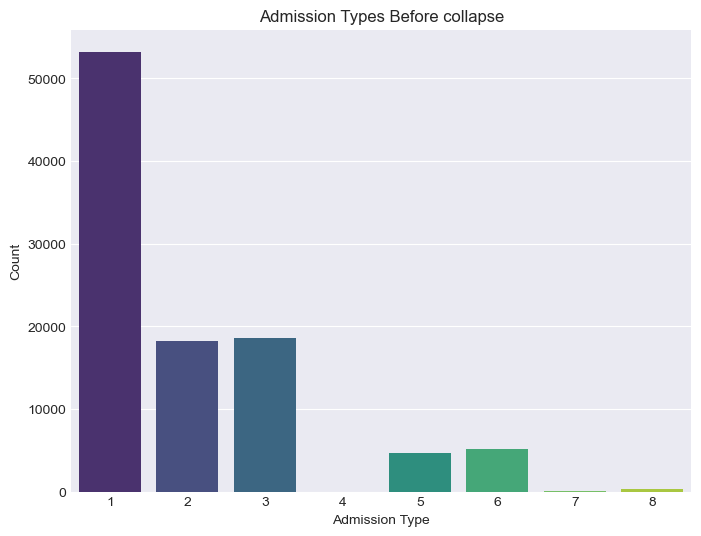

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='admission_type', palette='viridis')
plt.title('Admission Types Before collapse')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()

In [24]:
# Define a mapping for Admission Type

admission_mapping = {
    1: 'Emergency',      # Emergency
    2: 'Emergency',      # Urgent (now mapped to Emergency)
    3: 'Elective',       # Elective
    4: 'Newborn',        # Newborn
    5: 'Other',          # Not Available
    6: 'Emergency',      # Trauma Center
    7: 'Other',          # Not Mapped
    8: 'Other',          # Unknown
    9: 'Other'           # Other
}
# Apply the mapping to create the new collapsed column
df['admission_type'] = df['admission_type'].map(admission_mapping)

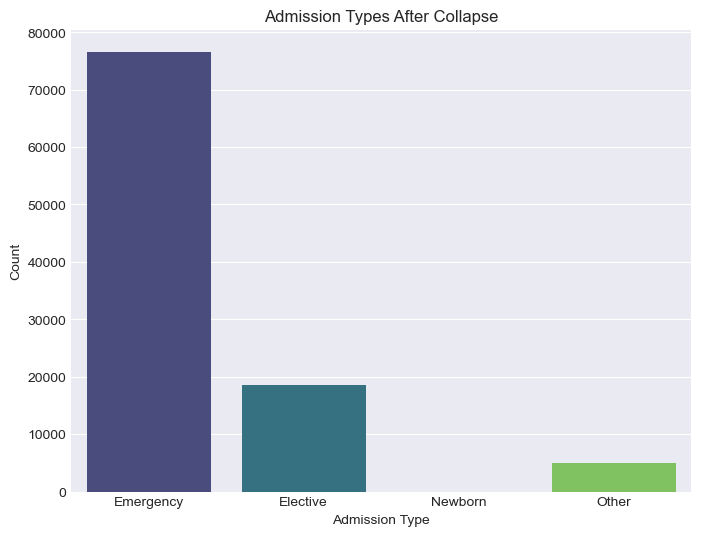

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='admission_type', palette='viridis')
plt.title('Admission Types After Collapse')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()

Accroding to the data dictionary the values in the admissiin types and their corresponding categories are: 
1. Emergency
2. Urgent
3. Elective
4. Newborn
5. Not Available
6. Trauma Center
7. Not Mapped
8. Unknown
9. Other

Next, to consolidate these categories into broader groups—Elective, Emergency, Newborn, and Other—we map the original IDs as follows:

* Elective: 3
* Emergency: 1, 2, 6
* Newborn: 4
* Other: 5, 7, 8, 9

__Discharge disposition__

In [26]:
df['discharge_disposition'].value_counts()

discharge_disposition
1     59003
3     13897
6     12830
18     3642
2      2115
22     1981
11     1640
5      1167
25      956
4       805
7       604
23      406
13      398
14      371
28      138
8       107
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

In [27]:
# Define IDs related to death or hospice
remove_ids = [11, 13, 14, 19, 20, 21]

# Filter out rows with discharge_disposition_id values in the remove_ids list
df = df[~df['discharge_disposition'].isin(remove_ids)]


Above, we filtered out rows with discharge_disposition_id values of 11, 13, 14, 19, 20, or 21, as these indicate death or hospice care, where readmission is not possible. This ensures the dataset only includes patients eligible for readmission predictions.

In [28]:
df['discharge_disposition'].value_counts()

discharge_disposition
1     59003
3     13897
6     12830
18     3642
2      2115
22     1981
5      1167
25      956
4       805
7       604
23      406
28      138
8       107
15       63
24       48
9        21
17       14
16       11
10        6
27        5
12        3
13        0
11        0
19        0
20        0
14        0
Name: count, dtype: int64

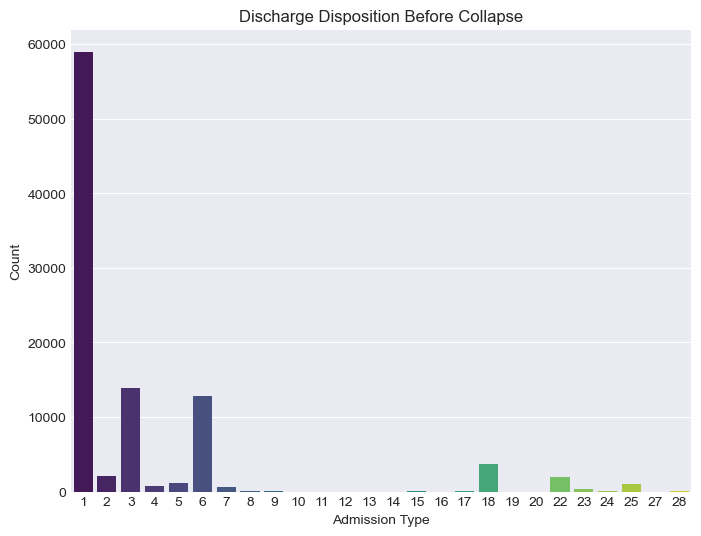

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='discharge_disposition', palette='viridis')
plt.title('Discharge Disposition Before Collapse')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()

In [30]:
# Collapse the discharge disposition
df['discharge_disposition'] = df['discharge_disposition'].apply(
    lambda x: 'Home' if x == 1 else 'Other'
)

In [31]:
df['discharge_disposition'].value_counts()

discharge_disposition
Home     59003
Other    38819
Name: count, dtype: int64

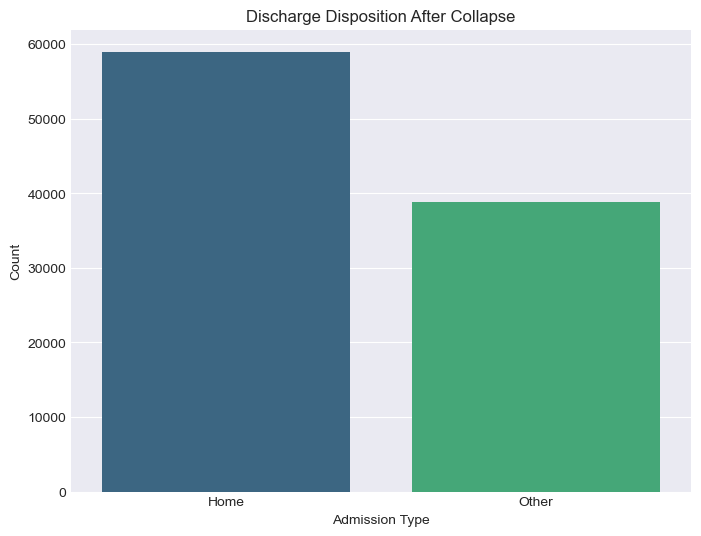

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='discharge_disposition', palette='viridis')
plt.title('Discharge Disposition After Collapse')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()

Above we collapsed the discharge_disposition column such that value 1 was mapped to "Home," indicating patients discharged to their residences and all other discharge disposition values were categorized as "Other," grouping all non-home discharges together.

In [33]:
df['admission_source'].value_counts()

admission_source
7     55155
1     28639
17     6472
4      3076
6      2119
2      1069
5       803
3       177
20      159
9       112
8        14
22       12
10        8
11        2
14        2
25        2
13        1
Name: count, dtype: int64

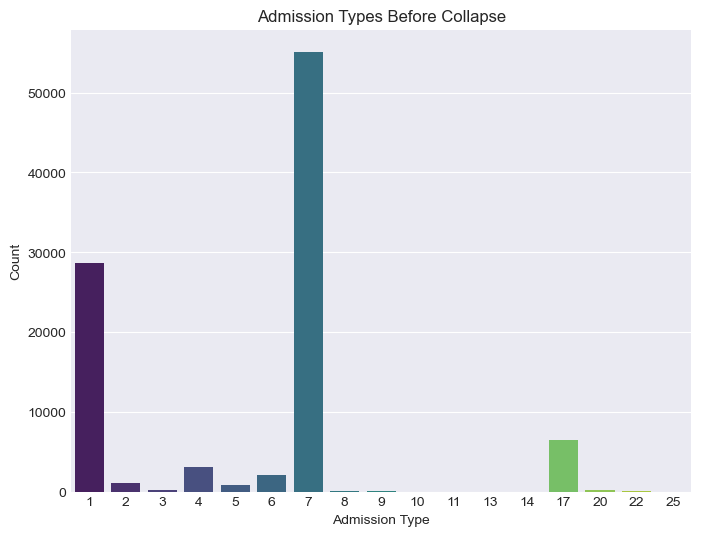

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='admission_source', palette='viridis')
plt.title('Admission Types Before Collapse')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()

In [35]:
# Define the mapping for Admission Source
source_mapping = {
    1: 'Referral',        
    2: 'Referral',       
    3: 'Referral',       
    4: 'Transfer',        
    5: 'Transfer',        
    6: 'Transfer',        
    7: 'Emergency Room',  
    8: 'Other',           
    9: 'Other',           
    10: 'Other',          
    # Continue mapping IDs 11–21 as 'Other'
    **{i: 'Other' for i in range(11, 22)}
    
}

df['admission_source'] = df['admission_source'].map(source_mapping)

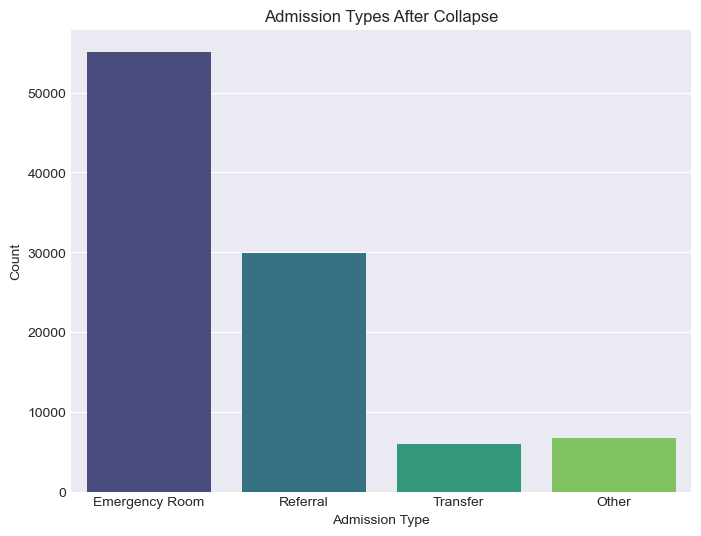

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='admission_source', palette='viridis')
plt.title('Admission Types After Collapse')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.show()

Given that we have patients with multiple encounters, I'll filter the dataset to keep only the most recent encounter for each patient by sorting the data by `patient_nbr`, then selecting the last encounter per patient.

In [37]:
# Sort data by patient_nbr 
data_sorted = df.sort_values(by="patient_nbr", ascending=True)

# Drop duplicate patient records, keeping only the last encounter per patient
df = data_sorted.drop_duplicates(subset="patient_nbr", keep="last")


#### Target Variable Transformation

In [38]:
df['readmitted'].value_counts()

readmitted
NO     45113
>30    18639
<30     5133
Name: count, dtype: int64

In [39]:
# Transform 'readmitted' to binary target variable
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


C:\Users\user\AppData\Local\Temp\ipykernel_10544\3444483601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


Above, we transform the readmitted variable from a multi-class to a binary format. Originally, the readmitted column contain three categories: '<30' (readmitted within 30 days), '>30' (readmitted after 30 days), and 'NO' (not readmitted). This transformation created a binary target variable where:

* 1 represents a readmission within 30 days ('<30')
* 0 represents both non-readmissions ('NO') and readmissions after 30 days ('>30')

#### Categorizing Diagnoses

In [40]:
# Function to map ICD-9 codes to broader categories
def categorize_icd9(code):
    try:
        code = float(code)  
    except ValueError:
        return 'Other'  
    
    # Category mappings based on ICD-9 code ranges
    if 390 <= code <= 459 or code == 785:
        return 'Circulatory'
    elif 460 <= code <= 519 or code == 786:
        return 'Respiratory'
    elif 520 <= code <= 579 or code == 787:
        return 'Digestive'
    elif 250 <= code < 251:
        return 'Diabetes'
    elif 800 <= code <= 999:
        return 'Injury'
    elif 710 <= code <= 739:
        return 'Musculoskeletal'
    elif 580 <= code <= 629 or code == 788:
        return 'Genitourinary'
    elif 140 <= code <= 239:
        return 'Neoplasms'
    elif 1 <= code <= 139:
        return 'Infectious Diseases'
    else:
        return 'Other'  # For codes outside specified ranges

In [41]:
# Apply the categorization function to each diagnosis column

df.loc[:, 'diag_1'] = df['diag_1'].apply(categorize_icd9)
df.loc[:, 'diag_2'] = df['diag_2'].apply(categorize_icd9)
df.loc[:, 'diag_3'] = df['diag_3'].apply(categorize_icd9)

In this step, we aimed to simplify the diagnostic columns (diag_1, diag_2, and diag_3) by categorizing ICD-9 codes into broader health-related categories. The diag columns originally contained ICD-9 codes representing various specific diagnoses, which are  too granular for effective analysis and modeling. To make these columns more manageable and to enhance the interpretability of our model, we grouped the ICD-9 codes into general categories based on established medical code ranges.

We began by creating a custom function that interprets each ICD-9 code and assigns it to one of several broader categories, such as Circulatory, Respiratory, Diabetes, and other relevant health conditions. This categorization was achieved by mapping each code range to its corresponding health category, using standard ICD-9 code groupings. For example, codes from 390 to 459 were grouped under "Circulatory," representing cardiovascular-related diagnoses, while codes from 460 to 519 fell under "Respiratory." Additionally, diabetes-related codes (250) were assigned to a "Diabetes" category, allowing us to focus on diabetes as a key condition of interest. Codes that did not fall within these standard medical ranges or were rare were assigned to a general "Other" category to keep the grouping process comprehensive.

By applying this categorization function to each of the diag columns, we replaced the original specific ICD-9 codes with their corresponding health categories, thus reducing the number of unique values. This data transformation facilitates easier analysis and may enhance model performance by reducing noise and focusing on broader health conditions that may correlate with readmission rates. This method follows a widely accepted approach to handling ICD-9 codes in health-related predictive modeling, as shown in various literature and case studies on similar datasets

Check the table below for reference

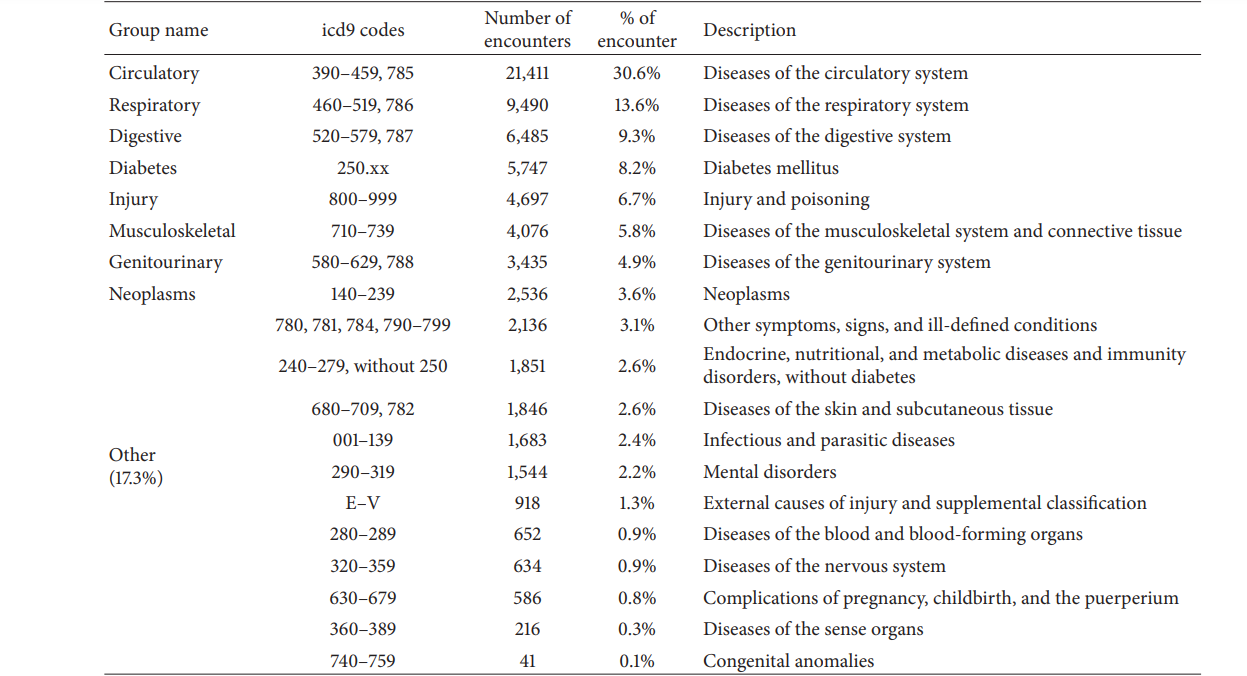

In [42]:
df.shape

(68885, 42)

####  Data Cleaning Documentation

1. __Data Type Conversion__

We converted the following integer columns to categorical types, as they represent categorical identifiers as described in the data description:
    * admission_type_id
    * discharge_disposition_id
    * admission_source_id

This conversion help us to optimize memory usage and allowed for appropriate handling in categorical encoding for predictive modeling.

2. __Identified and Handled Missing Values__

    * Identified columns with missing values and dropped columns with over 30% missing values and those with less than 2% such as: `weight, payer_code, medical_specialty, max_glu_serum, and A1Cresult`

    * Filled missing values in the race column with the label "Other"
    * Dropped rows with missing values in the diagnostic columns diag_1, diag_2, and diag_3
    * Removed rows with "Unknown/Invalid" values in the gender column, retaining only valid entries ("Male" and "Female")
    * Dropped columns citoglipton and examide, as all entries were "No" for these drugs, providing no discriminatory value for predicting readmission.
    * Checked for duplicate rows and confirmed no duplicates in the dataset.
3. We filtered out rows with discharge_disposition_id values of 11, 13, 14, 19, 20, or 21, as these indicate death or hospice care, where readmission is not possible.

4. We consolidated specific categories within the "`Admission Type`" and "`Admission Source`" columns

__Admission Type__

Mapped to Elective, Emergency (including Urgent and Trauma Center), Newborn, and Other.

__Admission Source__

Mapped to Referral (Physician, Clinic, and HMO referrals), Emergency Room, Transfer (from other healthcare facilities), and Other.


In [43]:
df.shape

(68885, 42)

## Feature Engineering

In [44]:
# Feature 1: Service Utilization
# Sum the values in the number of outpatient, emergency, and inpatient columns to represent total service utilization.
df['service_utilization'] = df[['number_outpatient', 'number_emergency', 'number_inpatient']].sum(axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_10544\1432800447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['service_utilization'] = df[['number_outpatient', 'number_emergency', 'number_inpatient']].sum(axis=1)


Above we created the "`Service Utilization`" by summing the values of number_outpatient, number_emergency, and number_inpatient to indicate the total healthcare services a patient used during their admission. This feature is essential for capturing the patient's healthcare needs and is often correlated with readmission risk, as higher utilization may indicate complex health conditions.

In [45]:
# Feature 2: Diabetes Treatment Change
# Combine `change` and `diabetesMed` to indicate if there has been any treatment change or diabetes medication prescribed.
df['diabetes_treatment_change'] = df.apply(lambda x: 1 if (x['change'] == 'Ch' and x['diabetesMed'] == 'Yes') else 0, axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_10544\2152144012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diabetes_treatment_change'] = df.apply(lambda x: 1 if (x['change'] == 'Ch' and x['diabetesMed'] == 'Yes') else 0, axis=1)


We created "`Diabetes Treatment Change`" by combining the change and diabetesMed columns to capture if any adjustment in diabetes treatment was made. This feature is particularly relevant as changes in diabetes treatment may indicate unstable diabetes management, a factor linked to readmission risk.

In [46]:
df['change'].value_counts()

change
No    37760
Ch    31125
Name: count, dtype: int64

In [47]:
df.tail().T

,99863,95282,93651,101748,96147
patient_nbr,189351095,189365864,189445127,189481478,189502619
race,Caucasian,Other,Caucasian,Caucasian,Caucasian
gender,Female,Male,Female,Female,Male
age,[80-90),[60-70),[80-90),[40-50),[40-50)
admission_type,Emergency,Emergency,Emergency,Emergency,Emergency
discharge_disposition,Home,Home,Home,Other,Home
admission_source,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Referral
time_in_hospital,1,3,3,14,5
num_lab_procedures,73,56,39,69,35
num_procedures,1,1,0,0,4


## Exploratory Data Analysis

In [48]:
# Initial Overview
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 68885 entries, 4267 to 96147
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   patient_nbr                68885 non-null  int64 
 1   race                       68885 non-null  object
 2   gender                     68885 non-null  object
 3   age                        68885 non-null  object
 4   admission_type             68885 non-null  object
 5   discharge_disposition      68885 non-null  object
 6   admission_source           68880 non-null  object
 7   time_in_hospital           68885 non-null  int64 
 8   num_lab_procedures         68885 non-null  int64 
 9   num_procedures             68885 non-null  int64 
 10  num_medications            68885 non-null  int64 
 11  number_outpatient          68885 non-null  int64 
 12  number_emergency           68885 non-null  int64 
 13  number_inpatient           68885 non-null  int64 
 14  diag_1  

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,service_utilization,diabetes_treatment_change
count,6.888500e+04,68885.000000,68885.000000,68885.000000,68885.000000,68885.000000,68885.000000,68885.000000,68885.000000,68885.000000,68885.000000,68885.000000
mean,5.526401e+07,4.312376,43.086492,1.418422,15.868186,0.309124,0.127198,0.338608,7.355172,0.074515,0.774929,0.451840
std,3.948020e+07,2.957587,19.834734,1.747616,8.273304,1.138189,0.650089,0.835012,1.887448,0.262610,1.712464,0.497679
min,1.350000e+02,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,2.340389e+07,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,4.898149e+07,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000
75%,8.773047e+07,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000,0.000000,1.000000,1.000000
max,1.895026e+08,14.000000,129.000000,6.000000,81.000000,38.000000,54.000000,15.000000,16.000000,1.000000,61.000000,1.000000


In [49]:
# Numerical feature statistics
numerical_features = ["time_in_hospital", "num_lab_procedures", "num_medications"]
numerical_summary = df[numerical_features].describe()
numerical_summary

,time_in_hospital,num_lab_procedures,num_medications
count,68885.000000,68885.000000,68885.000000
mean,4.312376,43.086492,15.868186
std,2.957587,19.834734,8.273304
min,1.000000,1.000000,1.000000
25%,2.000000,31.000000,10.000000
50%,4.000000,44.000000,14.000000
75%,6.000000,57.000000,20.000000
max,14.000000,129.000000,81.000000


Text(0.5, 1.0, 'Gender Distribution')

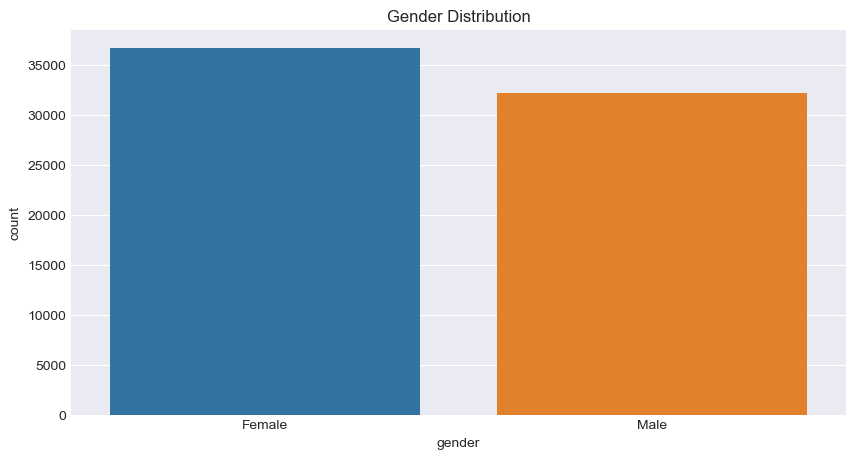

In [50]:
# Gender and Age Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")

__Distribution of Readmission Rate__

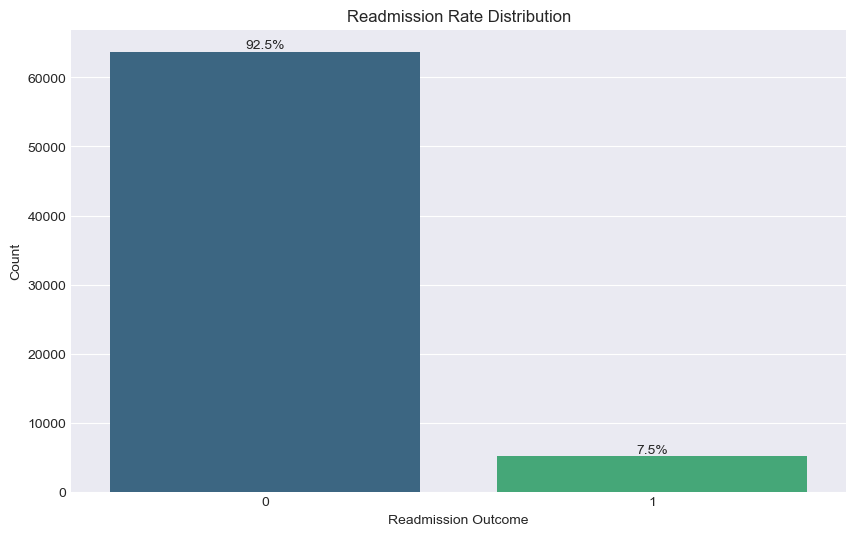

In [51]:
# Checking for 'readmitted' column and its unique values to verify the readmission outcome categories
if 'readmitted' in df.columns:
    readmitted_counts = df['readmitted'].value_counts(normalize=True) * 100  # Getting percentage distribution
    readmitted_counts_raw = df['readmitted'].value_counts()  # Raw counts for each category

    # Plotting the distribution of readmission outcomes
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='readmitted', order=readmitted_counts_raw.index, palette="viridis")
    plt.title("Readmission Rate Distribution")
    plt.xlabel("Readmission Outcome")
    plt.ylabel("Count")

    # Displaying the percentage of each category on the plot
    for index, value in enumerate(readmitted_counts_raw):
        plt.text(index, value, f"{readmitted_counts.iloc[index]:.1f}%", ha="center", va="bottom")

    plt.show()

In [52]:
readmitted_counts, readmitted_counts_raw

(readmitted
 0    92.54845
 1     7.45155
 Name: proportion, dtype: float64,
 readmitted
 0    63752
 1     5133
 Name: count, dtype: int64)

__Examine Relationship between time in hospital and readmission rates__

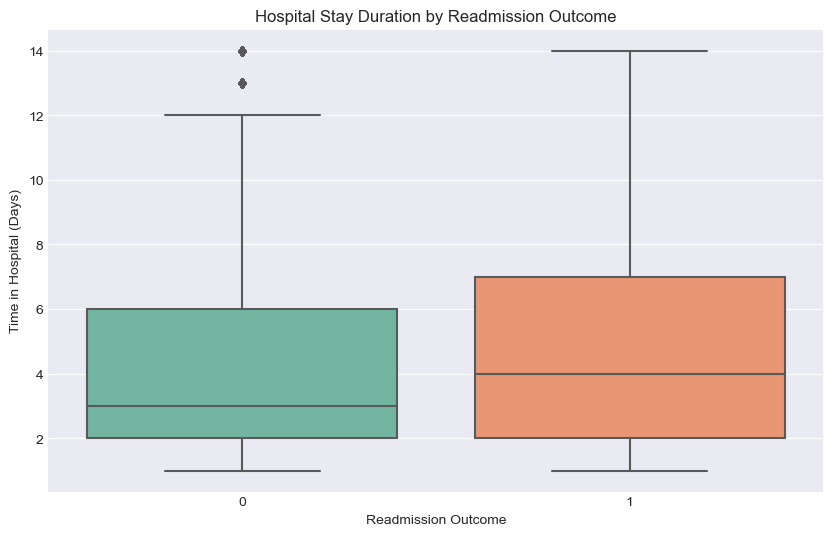

Average Time in Hospital by Readmission Outcome:
readmitted
0    4.270313
1    4.834794
Name: time_in_hospital, dtype: float64


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a boxplot to visualize 'time_in_hospital' across different 'readmitted' categories
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='readmitted', y='time_in_hospital', palette="Set2")

plt.title("Hospital Stay Duration by Readmission Outcome")
plt.xlabel("Readmission Outcome")
plt.ylabel("Time in Hospital (Days)")

plt.show()

# Calculating the average time in hospital for each readmission category
average_time_in_hospital = df.groupby('readmitted')['time_in_hospital'].mean()
print("Average Time in Hospital by Readmission Outcome:")
print(average_time_in_hospital)


__Relationship between age and readmission__

C:\Users\user\AppData\Local\Temp\ipykernel_10544\2965241482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.Categorical(df['age'], categories=age_order, ordered=True)


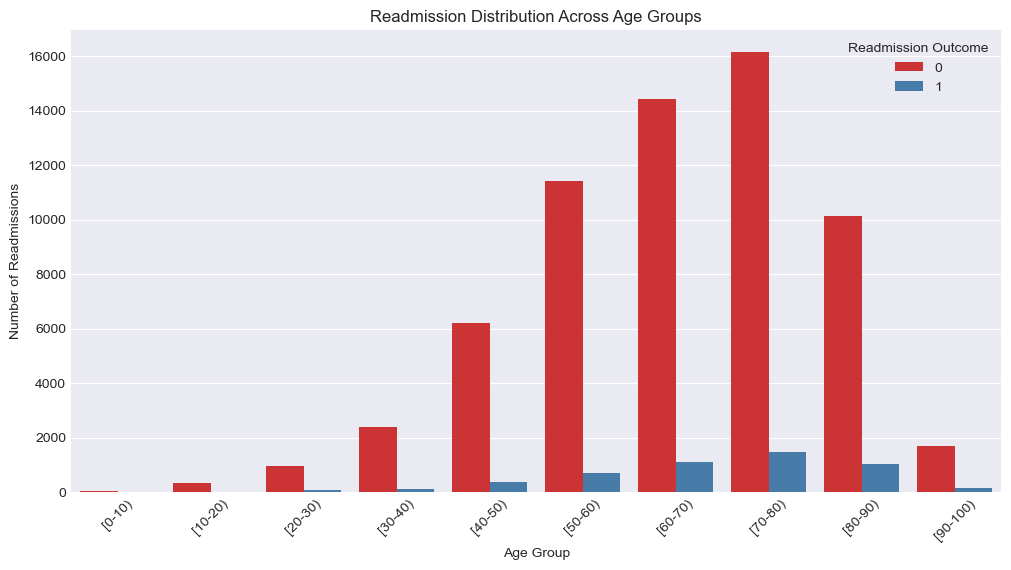

In [54]:
# Define the age order
age_order = ["[0-10)", "[10-20)", "[20-30)", "[30-40)", "[40-50)", 
             "[50-60)", "[60-70)", "[70-80)", "[80-90)", "[90-100)"]

# Convert the 'age' column to a categorical type with the specified order
df['age'] = pd.Categorical(df['age'], categories=age_order, ordered=True)

# Setting up the plot
plt.figure(figsize=(12, 6))

# Plotting the readmission distribution across age groups in the specified order
sns.countplot(data=df, x='age', hue='readmitted', palette="Set1", order=age_order)

plt.title("Readmission Distribution Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Number of Readmissions")
plt.legend(title="Readmission Outcome", loc="upper right")

plt.xticks(rotation=45)  # Rotate age labels for better readability
plt.show()

In [55]:
# Calculating the readmission rate by age group
age_readmission_rate = df.groupby('age')['readmitted'].value_counts(normalize=True).unstack() * 100
print("Readmission Rate by Age Group (%):")
print(age_readmission_rate)


Readmission Rate by Age Group (%):
readmitted          0         1
age                            
[0-10)      98.412698  1.587302
[10-20)     95.467422  4.532578
[20-30)     92.982456  7.017544
[30-40)     94.590357  5.409643
[40-50)     94.026683  5.973317
[50-60)     94.092445  5.907555
[60-70)     92.736747  7.263253
[70-80)     91.607518  8.392482
[80-90)     90.655209  9.344791
[90-100)    92.139738  7.860262


__Hospital Utilization Vs. Readmission__

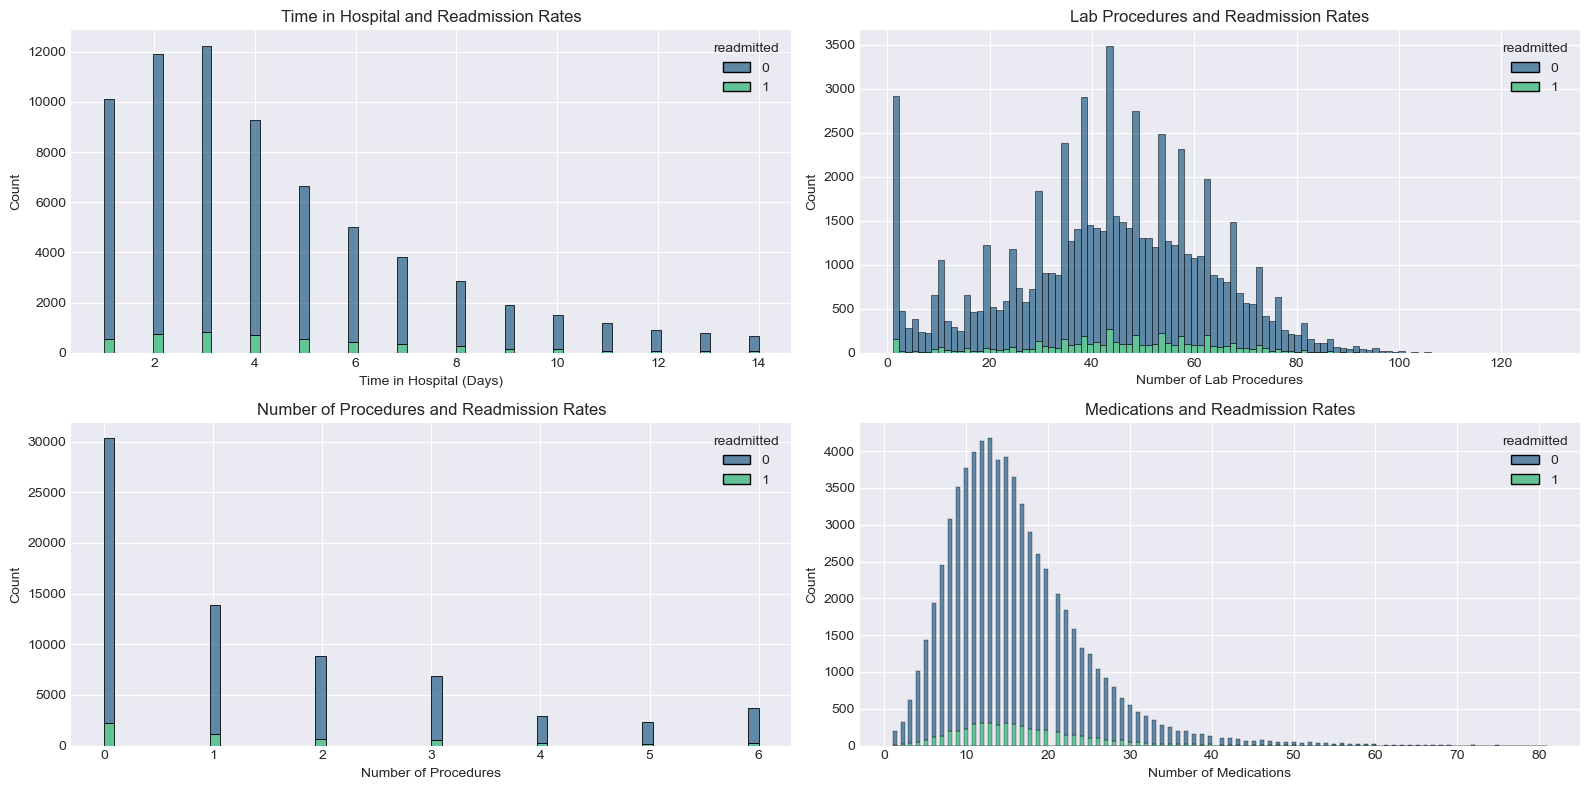

In [56]:
# Plotting Time in Hospital vs. Readmission
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='time_in_hospital', hue='readmitted', multiple="stack", palette="viridis")
plt.title("Time in Hospital and Readmission Rates")
plt.xlabel("Time in Hospital (Days)")
plt.ylabel("Count")

# Plotting Number of Lab Procedures vs. Readmission
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='num_lab_procedures', hue='readmitted', multiple="stack", palette="viridis")
plt.title("Lab Procedures and Readmission Rates")
plt.xlabel("Number of Lab Procedures")
plt.ylabel("Count")

# Plotting Number of Procedures vs. Readmission
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='num_procedures', hue='readmitted', multiple="stack", palette="viridis")
plt.title("Number of Procedures and Readmission Rates")
plt.xlabel("Number of Procedures")
plt.ylabel("Count")

# Plotting Number of Medications vs. Readmission
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='num_medications', hue='readmitted', multiple="stack", palette="viridis")
plt.title("Medications and Readmission Rates")
plt.xlabel("Number of Medications")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [57]:

# Summary Statistics for Hospital Utilization Metrics
hospital_utilization_summary = df.groupby('readmitted')[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications']].mean()
print("Average Hospital Utilization Metrics by Readmission Status:")
print(hospital_utilization_summary)

Average Hospital Utilization Metrics by Readmission Status:
            time_in_hospital  num_lab_procedures  num_procedures  \
readmitted                                                         
0                   4.270313           42.880553        1.422591   
1                   4.834794           45.644263        1.366647   

            num_medications  
readmitted                   
0                 15.781591  
1                 16.943698  


## Outlier Detection

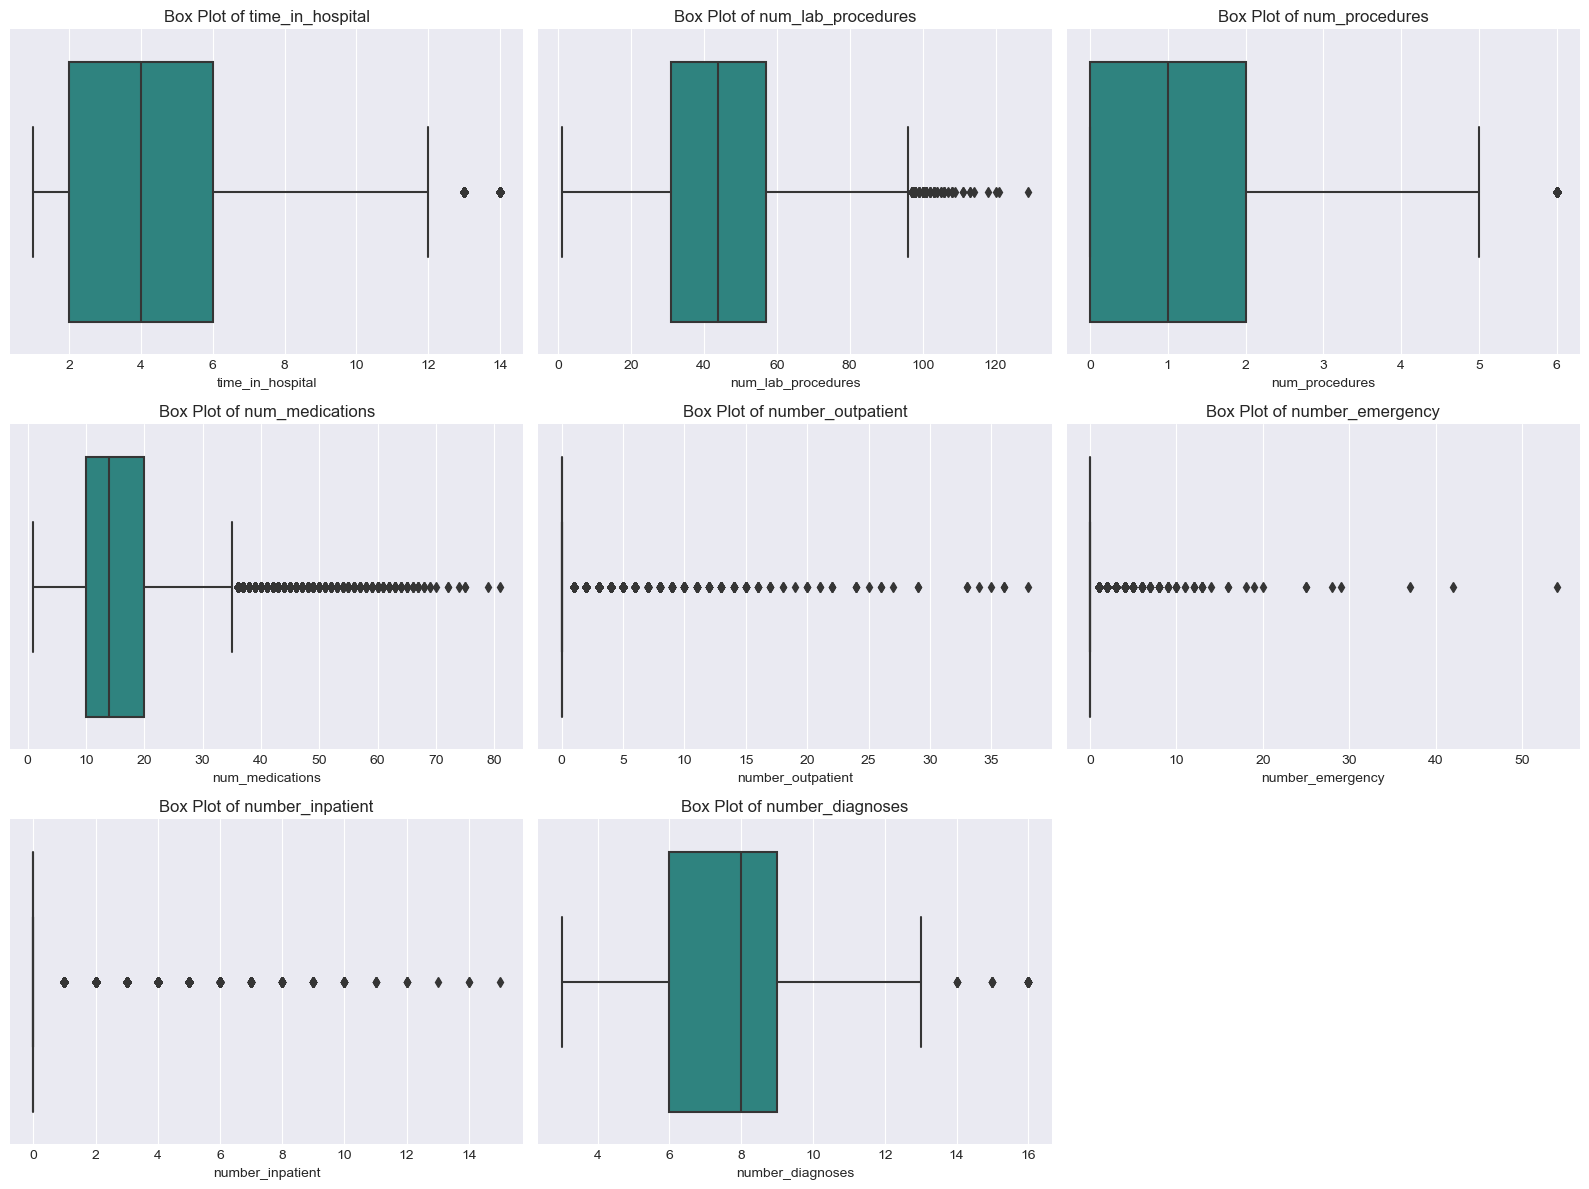

In [58]:
plt.figure(figsize=(16, 12))
columns_to_check = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Creating box plots for each column
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)  # Adjusting for an 8-plot grid
    sns.boxplot(data=df, x=column, palette="viridis")
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


The boxplots we plot above reveal several variables with significant outliers, particularly the `num_lab_procedures`, `num_medications`, and the hospital utilization metrics such as (`number_outpatient`, `number_emergency`, `number_inpatient`).

These outliers likely represent patients with more complex or chronic conditions. If we include these outliers, they may help us to capture the variance in readmission risk, but we may need to further transform them so they won't excessively skew our model's performance.

### Check for Multicollinearity

We will check for multicolinearity to see if two or more varibles are more closely related meaning the variable is highly predictable by other variables in the dataset.

1. We will plot heatmap to examine pairwise correlations between variables to identify any strong correlations (generally above 0.7 or 0.8).

2. Secondly, we will calculate the Variance Inflation Factor (VIF) values for each variable, which quantifies how much a variable is explained by the others. A VIF above 5 (sometimes 10) can indicate multicollinearity.

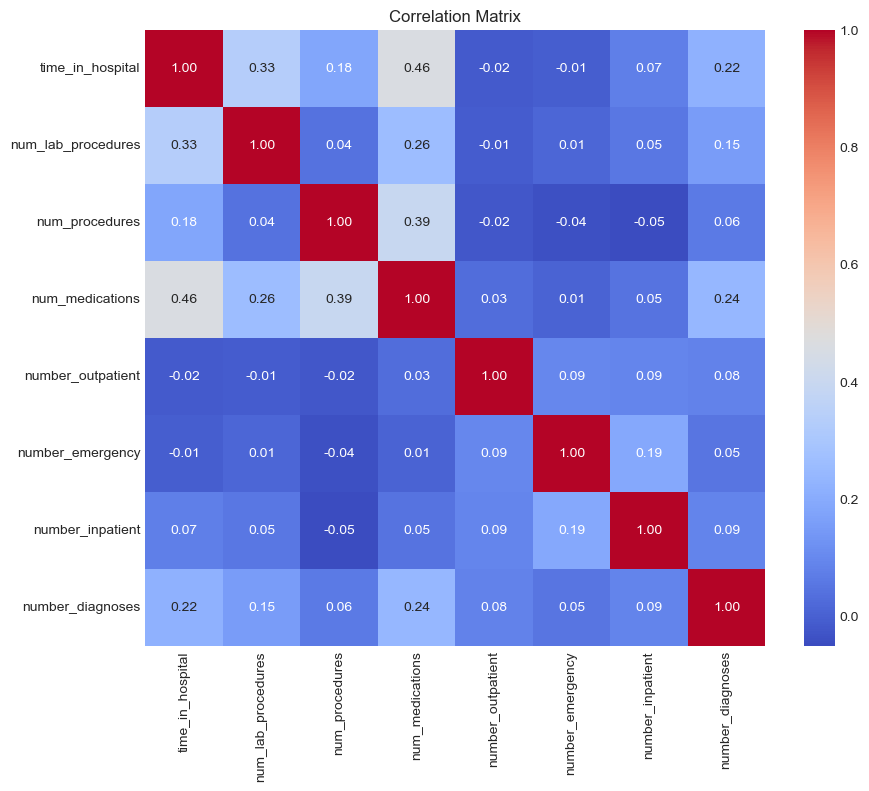

In [59]:
# 1. Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[columns_to_check].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [60]:
# 2 Calculating VIF for each variable
X = df[columns_to_check]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display the VIF results
print(vif_data)

             Variable       VIF
0    time_in_hospital  4.299063
1  num_lab_procedures  5.916550
2      num_procedures  1.979360
3     num_medications  7.035405
4   number_outpatient  1.098745
5    number_emergency  1.087221
6    number_inpatient  1.232485
7    number_diagnoses  7.275627


The correlation matrix above highlights relationships among numerical variables in the dataset. Variables like `time_in_hospital`, `num_lab_procedures`, and `num_medications` shows moderate correlations with each other. For example, `time_in_hospital` shows a moderate positive correlation with `num_medications` `(0.46)`, suggesting that patients who stay longer in the hospital tend to have more medications prescribed. However, overall, most variables display low correlations, which indicates limited multicollinearity.

__Variance Inflation Factor (VIF) Analysis__
VIF values were also calculated to quantitatively assess multicollinearity. Variables such as `num_medications` (VIF ≈ 7.04) and `number_diagnoses` (VIF ≈ 7.28) have higher VIF values, indicating potential multicollinearity issues. A VIF above 5 generally suggests moderate multicollinearity, while values above 10 indicate high multicollinearity. In our case, `num_lab_procedures` (VIF ≈ 5.92) is close to the threshold, suggesting that it may also contribute to multicollinearity, though less severely.

##  Statistical Testing

In [61]:
df.dtypes

patient_nbr                     int64
race                           object
gender                         object
age                          category
admission_type                 object
discharge_disposition          object
admission_source               object
time_in_hospital                int64
num_lab_procedures              int64
num_procedures                  int64
num_medications                 int64
number_outpatient               int64
number_emergency                int64
number_inpatient                int64
diag_1                         object
diag_2                         object
diag_3                         object
number_diagnoses                int64
metformin                      object
repaglinide                    object
nateglinide                    object
chlorpropamide                 object
glimepiride                    object
acetohexamide                  object
glipizide                      object
glyburide                      object
tolbutamide 

One of our goal is to determine the key factors or variables that are significantly associated with higher readmission rates

#### Perform Chi-Square Test for Categorical Variables

In [62]:
from scipy.stats import chi2_contingency
p_value = 0.05
categorical_columns = ['age', 'race', 'gender', 'admission_type', 'discharge_disposition', 'admission_source', 
                       'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 
                       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
                       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
                       'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                       'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 
                       'change', 'diabetesMed', 'diabetes_treatment_change']

# Perform Chi-Square test
for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['readmitted'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {column}:")
    print(f"Chi2 Statistic: {chi2}, p-value: {p}\n")

Chi-Square Test for age:
Chi2 Statistic: 167.98035225442402, p-value: 1.6253329849864653e-31

Chi-Square Test for race:
Chi2 Statistic: 21.166262563372634, p-value: 0.00029351510885688433

Chi-Square Test for gender:
Chi2 Statistic: 0.04509884169857363, p-value: 0.8318223836053278

Chi-Square Test for admission_type:
Chi2 Statistic: 26.67696787788807, p-value: 6.880627535695976e-06

Chi-Square Test for discharge_disposition:
Chi2 Statistic: 486.86308343958103, p-value: 6.860785754291462e-108

Chi-Square Test for admission_source:
Chi2 Statistic: 19.14146833069803, p-value: 0.0002555883721781113

Chi-Square Test for diag_1:
Chi2 Statistic: 52.38390970372012, p-value: 3.824139790409445e-08

Chi-Square Test for diag_2:
Chi2 Statistic: 53.141645305089384, p-value: 2.7475933448723098e-08

Chi-Square Test for diag_3:
Chi2 Statistic: 58.391342714776876, p-value: 2.7339592116119318e-09

Chi-Square Test for metformin:
Chi2 Statistic: 28.264735848614002, p-value: 3.195767951029505e-06

Chi-Squar

### t-Test or ANOVA for Continuous Variables

In [63]:
from scipy.stats import ttest_ind, f_oneway

continuous_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                      'num_medications', 'number_outpatient', 'number_emergency', 
                      'number_inpatient', 'number_diagnoses', 'service_utilization']

for column in continuous_columns:
    # Assuming 'readmitted' is binary (0 and 1)
    readmitted = df[df['readmitted'] == 1][column]
    not_readmitted = df[df['readmitted'] == 0][column]
    
    # Perform t-test for binary target
    t_stat, p_val = ttest_ind(readmitted, not_readmitted)
    print(f"t-Test for {column}:")
    print(f"t-statistic: {t_stat}, p-value: {p_val}\n")
    
    # If 'readmitted' has multiple categories, use ANOVA
    if len(df['readmitted'].unique()) > 2:
        groups = [df[df['readmitted'] == val][column] for val in df['readmitted'].unique()]
        f_stat, p_val = f_oneway(*groups)
        print(f"ANOVA for {column}:")
        print(f"F-statistic: {f_stat}, p-value: {p_val}\n")


t-Test for time_in_hospital:
t-statistic: 13.17120152596602, p-value: 1.4352430401538942e-39

t-Test for num_lab_procedures:
t-statistic: 9.610014727987233, p-value: 7.486694150068233e-22

t-Test for num_procedures:
t-statistic: -2.2064084497542784, p-value: 0.027358701273486788

t-Test for num_medications:
t-statistic: 9.687900904316365, p-value: 3.5068736337570717e-22

t-Test for number_outpatient:
t-statistic: 2.8334294156350857, p-value: 0.004606485491585206

t-Test for number_emergency:
t-statistic: 9.426357834702786, p-value: 4.371878732304784e-21

t-Test for number_inpatient:
t-statistic: 38.403287508993614, p-value: 0.0

t-Test for number_diagnoses:
t-statistic: 12.265566644870486, p-value: 1.5065403299455352e-34

t-Test for service_utilization:
t-statistic: 24.0885652394154, p-value: 1.115103299287175e-127



__Chi-Square Tests for Categorical Variables__

The results from Chi-Square and t-tests revealed several variables with significant associations with patient readmission. These findings identify potential factors that may influence readmission rates and offer a foundation for feature selection in predictive modeling. Notable findings include:

Variables such as age, race, admission_type, discharge_disposition, and admission_source show strong associations with readmission rates.

Several diabetes medications, notably metformin, insulin, and changes in diabetesMed status, were also significant.

Diagnostic codes (diag_1, diag_2, diag_3) are linked to readmission likelihood, indicating potential influence of specific diagnoses.

__t-Tests for Continuous Variables__

Variables such as time_in_hospital, number_inpatient, and service_utilization showed associations with readmission rates, suggesting that increased utilization of healthcare services and prolonged hospital stays are predictive factors.

These significant associations will guide feature selection, ensuring inclusion of variables that could enhance model performance.

## Feature Selection

For the next step we will perform feature selection to identify the most relevant features for predicting hospital readmissions. This process can improve our model accuracy and interpretability by reducing noise and computational complexity.

__1. We will start with the VIF-based filtering to address multicollinearity issues we encountered above.__

In [64]:
# Selecting numerical columns for VIF analysis
numerical_features = df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                         'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']]

# Function to calculate VIF for numerical features
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Iterative process to filter out high VIF features
while True:
    vif_data = calculate_vif(numerical_features)
    max_vif = vif_data['VIF'].max()
    if max_vif < 5:  # Set threshold for acceptable VIF
        break
    else:
        # Drop the feature with the highest VIF
        feature_to_drop = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
        print(f"Dropping {feature_to_drop} with VIF: {max_vif}")
        numerical_features = numerical_features.drop(columns=[feature_to_drop])

# Display the final features and their VIF scores
print("Remaining features after VIF filtering:")
print(calculate_vif(numerical_features))


Dropping number_diagnoses with VIF: 7.275627230973944
Dropping num_medications with VIF: 6.069173383422482
Remaining features after VIF filtering:
              Feature       VIF
0    time_in_hospital  3.421590
1  num_lab_procedures  3.424289
2      num_procedures  1.627558
3   number_outpatient  1.077197
4    number_emergency  1.083453
5    number_inpatient  1.218231


Above, we specifically selected numerical features for VIF calculation, excluding categorical or medication-related columns.
The process removes features with the highest VIF iteratively, which reduces multicollinearity by dropping redundant features.

The features that were removed due to high VIF scores were `number_diagnoses ` and `num_medications ` then we display the final list of selected features with acceptable VIF values.

__2. Check Correlation with the Target Variable__

In [65]:
# Calculate correlation with the target variable
correlation_with_target = df[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                              'number_outpatient', 'number_emergency', 'number_inpatient', 'readmitted']].corr()
print(correlation_with_target['readmitted'])


time_in_hospital      0.050121
num_lab_procedures    0.036591
num_procedures       -0.008406
number_outpatient     0.010795
number_emergency      0.035893
number_inpatient      0.144781
readmitted            1.000000
Name: readmitted, dtype: float64


__4. Tree-Based Feature Importance__

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Step 1: Encode categorical variables.
categorical_features = ['race', 'gender', 'age', 'admission_type', 'discharge_disposition', 'admission_source', 
                        'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
                        'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
                        'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 
                        'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
                        'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


# Dictionary to hold the label mappings for each feature
label_mappings = {}

# Label encoding
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df.loc[:, feature] = le.fit_transform(df[feature].astype(str))
#     df[feature] = le.fit_transform(df[feature].astype(str))
    label_encoders[feature] = le
    # Store the mapping in the dictionary
    label_mappings[feature] = dict(zip(le.classes_, le.transform(le.classes_)))

    
  
# Print out the label mappings
for feature, mapping in label_mappings.items():
    print(f"Feature '{feature}' label mapping:")
    print(mapping)
    print()
    
    
Feature 'race' label mapping:
{'AfricanAmerican': 0, 'Asian': 1, 'Caucasian': 2, 'Hispanic': 3, 'Other': 4}

Feature 'gender' label mapping:
{'Female': 0, 'Male': 1}

Feature 'age' label mapping:
{'[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8, '[90-100)': 9}

Feature 'admission_type' label mapping:
{'Elective': 0, 'Emergency': 1, 'Newborn': 2, 'Other': 3}

Feature 'admission_source' label mapping:
{'Emergency Room': 0, 'Other': 1, 'Referral': 2, 'Transfer': 3, 'nan': 4}

Feature 'diag_1' label mapping:
{'Circulatory': 0, 'Diabetes': 1, 'Digestive': 2, 'Genitourinary': 3, 'Infectious Diseases': 4, 'Injury': 5, 'Musculoskeletal': 6, 'Neoplasms': 7, 'Other': 8, 'Respiratory': 9}

Feature 'diag_2' label mapping:
{'Circulatory': 0, 'Diabetes': 1, 'Digestive': 2, 'Genitourinary': 3, 'Infectious Diseases': 4, 'Injury': 5, 'Musculoskeletal': 6, 'Neoplasms': 7, 'Other': 8, 'Respiratory': 9}

Feature 'diag_3' label mapping:
{'Circulatory': 0, 'Diabetes': 1, 'Digestive': 2, 'Genitourinary': 3, 'Infectious Diseases': 4, 'Injury': 5, 'Musculoskeletal': 6, 'Neoplasms': 7, 'Other': 8, 'Respiratory': 9}

Feature 'metformin' label mapping:
{'Down': 0, 'No': 1, 'Steady': 2, 'Up': 3}

Feature 'glipizide' label mapping:
{'Down': 0, 'No': 1, 'Steady': 2, 'Up': 3}

Feature 'glyburide' label mapping:
{'Down': 0, 'No': 1, 'Steady': 2, 'Up': 3}

Feature 'insulin' label mapping:
{'Down': 0, 'No': 1, 'Steady': 2, 'Up': 3}




Feature 'race' label mapping:
{'AfricanAmerican': 0, 'Asian': 1, 'Caucasian': 2, 'Hispanic': 3, 'Other': 4}

Feature 'gender' label mapping:
{'Female': 0, 'Male': 1}

Feature 'age' label mapping:
{'[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4, '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8, '[90-100)': 9}

Feature 'admission_type' label mapping:
{'Elective': 0, 'Emergency': 1, 'Newborn': 2, 'Other': 3}

Feature 'discharge_disposition' label mapping:
{'Home': 0, 'Other': 1}

Feature 'admission_source' label mapping:
{'Emergency Room': 0, 'Other': 1, 'Referral': 2, 'Transfer': 3, 'nan': 4}

Feature 'diag_1' label mapping:
{'Circulatory': 0, 'Diabetes': 1, 'Digestive': 2, 'Genitourinary': 3, 'Infectious Diseases': 4, 'Injury': 5, 'Musculoskeletal': 6, 'Neoplasms': 7, 'Other': 8, 'Respiratory': 9}

Feature 'diag_2' label mapping:
{'Circulatory': 0, 'Diabetes': 1, 'Digestive': 2, 'Genitourinary': 3, 'Infectious Diseases': 4, 'Injury': 5, 'Musculoskeletal': 6, '

In [68]:
# Define feature set X and target variable y
X = df.drop(columns=['patient_nbr', 'readmitted'])  # drop non-predictive and target columns
y = df['readmitted']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
# Step 2: Feature Importance from Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances and the select top 20
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
selected_features_rf = feature_importances.head(20).index
print("Top features by Random Forest Importance:\n", feature_importances.head(20))

Top features by Random Forest Importance:
 num_lab_procedures     0.122119
num_medications        0.104938
time_in_hospital       0.072519
diag_1                 0.060159
age                    0.059779
diag_2                 0.059735
diag_3                 0.059109
num_procedures         0.051268
number_diagnoses       0.049008
insulin                0.032654
admission_source       0.030347
number_inpatient       0.029613
service_utilization    0.029425
race                   0.027156
gender                 0.024512
metformin              0.019000
admission_type         0.017942
glipizide              0.017308
number_outpatient      0.016154
glyburide              0.015344
dtype: float64


In [70]:
# Step 3: Evaluate Model Performance on the Selected Features
X_train_selected = X_train[selected_features_rf]
X_test_selected = X_test[selected_features_rf]

# Train a model and evaluate
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_selected, y_train)
y_pred = final_model.predict(X_test_selected)

In [71]:
# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy with selected features: {accuracy:.2f}")

Model accuracy with selected features: 0.92


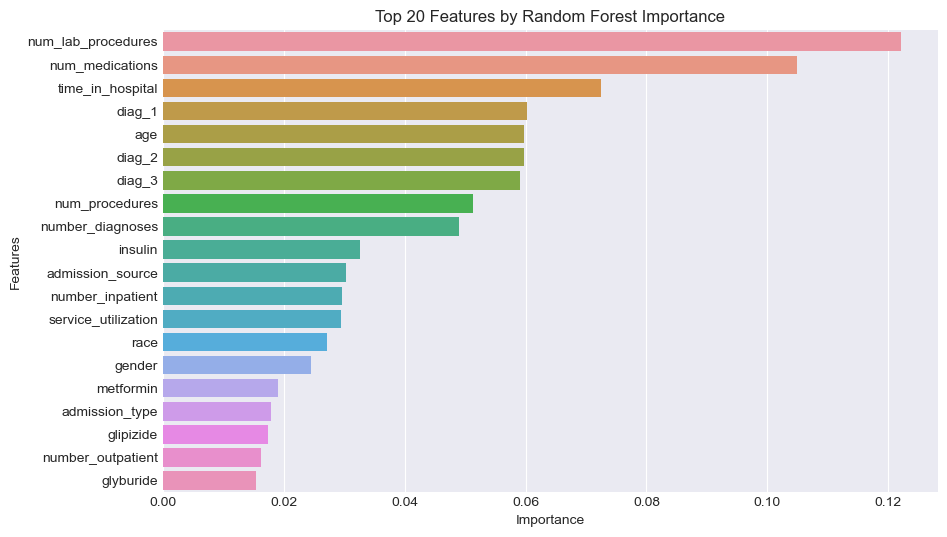

In [72]:
# Plot important features from Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.head(20), y=feature_importances.head(20).index)
plt.title("Top 20 Features by Random Forest Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

## Model Training and Evaluation

In [73]:
X = df[selected_features_rf]
y = df['readmitted']

#### 1. Logistic Regression

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2', max_iter=1000)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [75]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1743,2,1745
1,145,0,145
All,1888,2,1890


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy is 0.93
Precision is 0.24
Recall is 0.00


#### 1.2 Applying SMOTE to Logisitic Regression

In [77]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))


Original dataset shape Counter({0: 50990, 1: 4118})
New dataset shape Counter({0: 50990, 1: 50990})


In [78]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2', max_iter=1000)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [79]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1862,1932,3794
1,140,172,312
All,2002,2104,4106


In [80]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)

Accuracy is 0.59
Precision is 0.59
Recall is 0.60


#### 2. Random Forest

In [81]:
X = df[selected_features_rf]
y = df['readmitted']

print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 63752, 1: 5133})
New dataset shape Counter({1: 63752, 0: 63752})


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
# rm.fit(X_train, y_train)


# Training Random Forest
rm = RandomForestClassifier(n_estimators=10, max_depth=25, criterion="gini", min_samples_split=10)
rm.fit(X_train, y_train)
rm_pred = rm.predict(X_test)
rm_pred_proba = rm.predict_proba(X_test)[:, 1]
rm_prd = rm.predict(X_test)

In [83]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2594,2107,4701
1,182,165,347
All,2776,2272,5048


In [84]:
accuracy_rm = accuracy_score(y_test, rm_prd)
precision_rm = precision_score(y_test, rm_prd)
recall_rm = recall_score(y_test, rm_prd)

f1_rm = f1_score(y_test, rm_pred)
auc_rm = roc_auc_score(y_test, rm_pred_proba)

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(y_test, rm_prd)))


print("F1 Score: {:.2f}".format(f1_rm))
print("AUC-ROC: {:.2f}".format(auc_rm))

Accuracy is 0.95
Precision is 1.00
Recall is 0.91
F1 Score: 0.95
AUC-ROC: 0.97


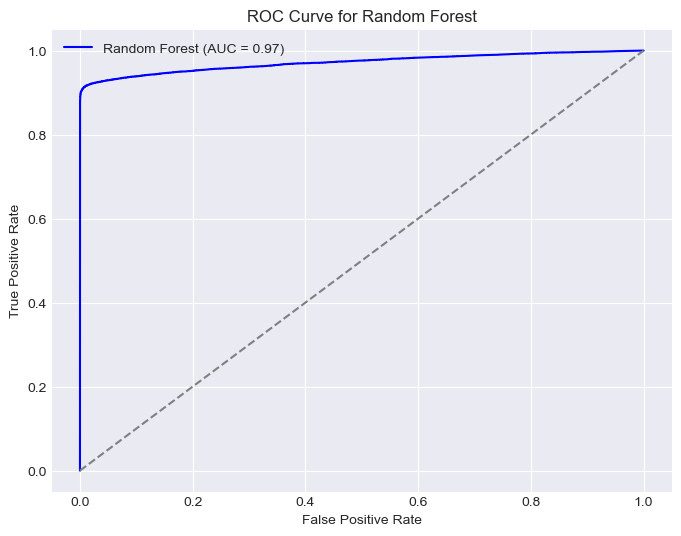

In [85]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rm_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {auc_rm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.show()

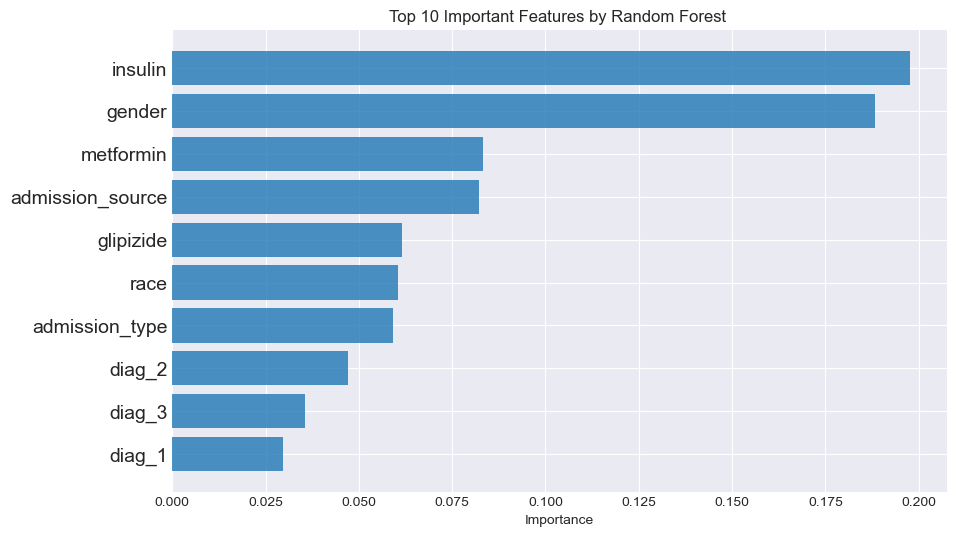

In [86]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Top 10 Important Features by Random Forest ')
plt.show()

#### 3. Decision Tree

In [87]:
X = df[selected_features_rf]
y = df['readmitted']

In [88]:
print('Original dataset shape {}'.format(Counter(y)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 63752, 1: 5133})
New dataset shape Counter({1: 63752, 0: 63752})


In [89]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)
dtree_pred_proba = dtree.predict_proba(X_test)[:, 1]
dtree_prd = dtree.predict(X_test)

In [90]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2431,2270,4701
1,175,172,347
All,2606,2442,5048


In [91]:
accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

f1_dtree = f1_score(y_test, dtree_prd)
auc_dtree = roc_auc_score(y_test, dtree_pred_proba)

print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

print("F1 Score: {:.2f}".format(f1_dtree))
print("AUC-ROC: {:.2f}".format(auc_dtree))


Accuracy is 0.93
Precision is 0.94
Recall is 0.92
F1 Score: 0.93
AUC-ROC: 0.94


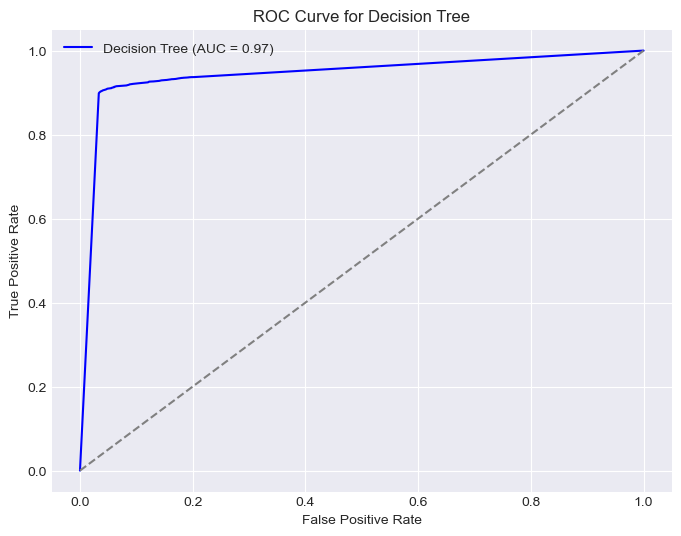

In [92]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dtree_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Decision Tree (AUC = {auc_rm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.legend()
plt.show()

In [93]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

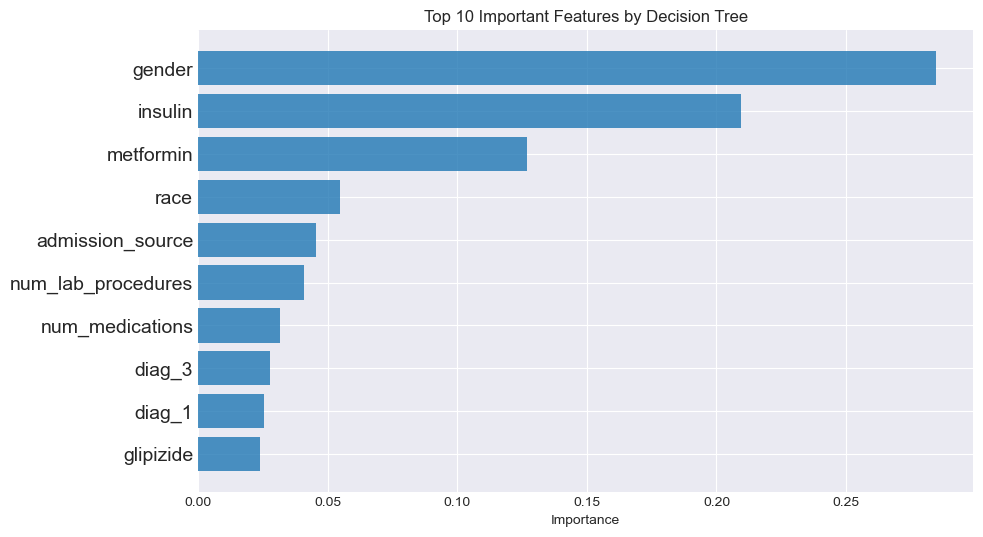

In [94]:
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Top 10 Important Features by Decision Tree')
plt.show()

Above, we trained three different models —`Logistic Regression`, `Random Forest`, and `Decision Tree`. The dataset is initially imbalanced, so SMOTE (Synthetic Minority Over-sampling Technique) is applied to balance it. After training, the models are evaluated based on accuracy, precision, and recall.


### Model Comparism

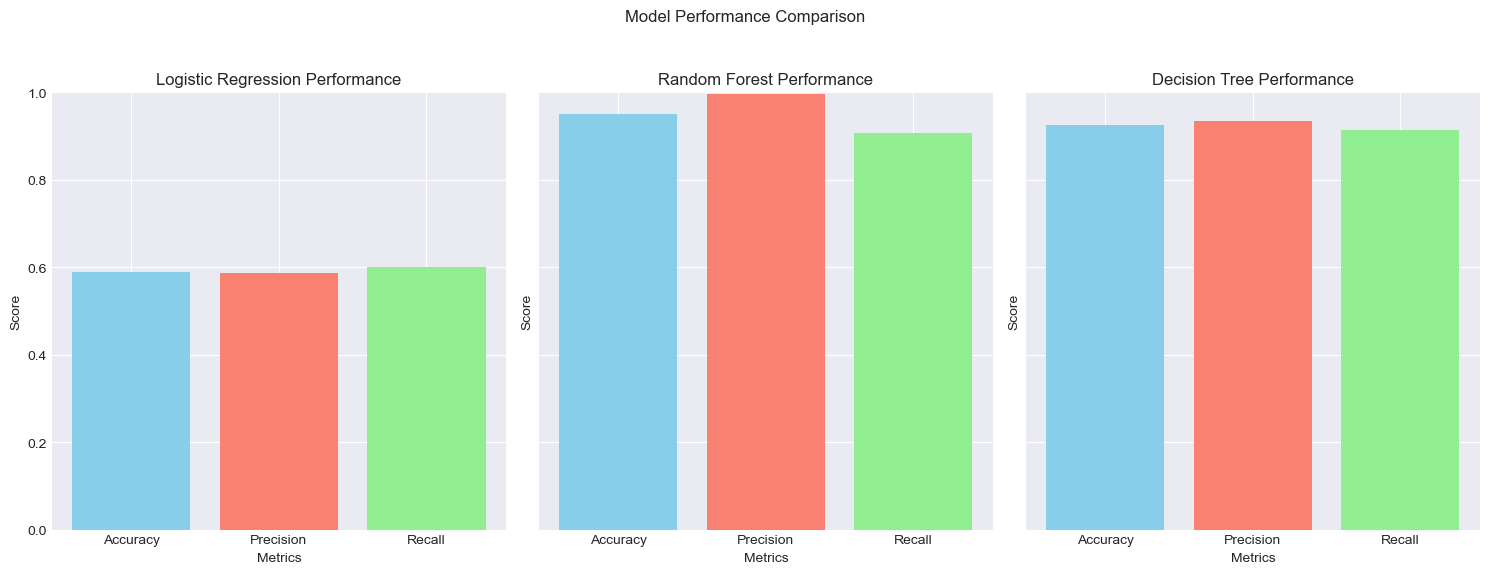

In [95]:
models = ["Logistic Regression", "Random Forest", "Decision Tree"]
accuracy = [accuracy_logit, accuracy_rm, accuracy_dtree]
precision = [precision_logit, precision_rm, precision_dtree]
recall = [recall_logit, recall_rm, recall_dtree]

# Setting up figure and axes for separate charts for each of the model
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
metrics = ["Accuracy", "Precision", "Recall"]
model_metrics = [accuracy, precision, recall]
colors = ["skyblue", "salmon", "lightgreen"]

# Plot each model in their separate subplot
for i, (model, ax) in enumerate(zip(models, axs)):
    ax.bar(metrics, [accuracy[i], precision[i], recall[i]], color=colors)
    ax.set_ylim(0, 1)  # Set y-axis limits to [0,1] for easier comparison
    ax.set_title(f"{model} Performance")
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Score")
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(metrics)

plt.suptitle("Model Performance Comparison")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The results of our model shows some key aspects of performance, particularly with the class imbalance in our dataset.

In the model training, we observed the impact of handling class imbalance with SMOTE on three models: `Logistic Regression`, `Random Forest`, and `Decision Tree`. Logistic Regression without SMOTE showed high accuracy but very low recall, suggesting it heavily favored the majority class. After applying SMOTE, the model's performance on readmissions improved in precision and recall, though accuracy decreased, indicating Logistic Regression may struggle with the data's complexity even after balancing.

Random Forest with SMOTE performed exceptionally well across all metrics, achieving high accuracy, precision, and recall. However, the perfect precision score of 1.00 could imply potential overfitting, warranting further tuning. 

Decision Tree also benefited from SMOTE, showing good balance in precision and recall but potentially lacks stability compared to Random Forest.

__Model Selection:__ Based on our evaluation, we have chosen the Decision Tree model as the final model due to its strong performance (AUC-ROC: 0.94, F1 Score: 0.93) and high interpretability, making it ideal for understanding key factors in readmission prediction.

__Next Step__

To further enhance these models, the next steps will focus on refining the models using hyperparameter tuning, particularly for `Random Forest` and `Decision Tree`, in other to enhance generalization and reduce the risk of overfitting. 

Additionally, we could explore alternative methods like threshold adjustments for classification, as well as other ensemble techniques (such as Boosting or Voting Classifiers), to better balance precision and recall. 

This approach is justified by the need to optimize model performance on readmission predictions while managing class imbalance effectively.

### Model Deployment
  
We will finalize and save the Decision Tree model for deployment using `pickle`

To prepare our Decision Tree model for deployment, we would retrain it on the entire balanced dataset, including both current training and test sets. This approach leverages all available data to improve the model’s generalization ability.

__1. Retrain on the Full Dataset__

Since we used SMOTE to handle class imbalance, we will apply SMOTE again to the entire dataset (X and y) and then train the model on this expanded dataset.

In [105]:
# Define X and y with all data
X = df[selected_features_rf]
y = df['readmitted']

# Apply SMOTE to balance the full dataset
smt = SMOTE(random_state=20)
X_balanced, y_balanced = smt.fit_resample(X, y)

# Retrain the Decision Tree on the fully balanced data
dtree_final = DecisionTreeClassifier(max_depth=28, criterion="entropy", min_samples_split=10)
dtree_final.fit(X_balanced, y_balanced)


DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

__2. Save the Final Model for Deployment__

After training on the full dataset, we will save the model using pickle.

In [97]:
import pickle

# Save the model
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dtree_final, file)
print("Model saved as decision_tree_model.pkl")

Model saved as decision_tree_model.pkl


In [98]:
# Load the model
with open('decision_tree_model.pkl', 'rb') as file:
    dtree_loaded = pickle.load(file)
print("Model loaded successfully.")

Model loaded successfully.


### Test prediction

In [107]:
# Example new data to test the model
new_data = pd.DataFrame({
    'num_lab_procedures': [45],
    'num_medications': [50],
    'time_in_hospital': [5],
    'diag_1': [5],  
    'age': [50-60],
    'diag_2': [0],
    'diag_3': [0],
    'num_procedures': [1],
    'number_diagnoses': [9],
    'insulin': [0], 
    'admission_source': [1],
    'number_inpatient': [1],
    'service_utilization': [15],
    'race': [2],
    'gender': [1],
    'metformin': [0],
    'admission_type': [3],
    'glipizide': [0],
    'number_outpatient': [2],
    'glyburide': [0]
})

new_data = new_data[selected_features_rf]

# Predict using the loaded model
prediction = dtree_loaded.predict(new_data)
print("Predicted class:", prediction)


Predicted class: [1]


The Decision Tree model was retrained on the fully balanced dataset (training and test sets combined) using SMOTE and was saved with pickle for easy deployment.

After loading the model, predictions were successfully tested on new data.

## Conclusion

The Decision Tree model demonstrated reliable performance for predicting hospital readmissions and is ready for deployment. Future work will refine the model to enhance its effectiveness.


## References

* Afolabi, M. O., & Akinwunmi, B. O. (2020). Estimating the prevalence, hospitalization, and mortality from type 2 diabetes mellitus in Nigeria: A systematic review and meta-analysis. BMJ Open, 10(5), e015424. https://doi.org/10.1136/bmjopen-2016-015424

* Comparison of machine learning models for predicting 30-day readmission rates for patients with diabetes. Journal of Medical Internet Research. Retrieved from [JMAI](https://jmai.amegroups.org/article/view/9179/html)


* Deep Learning vs Traditional Models for Predicting Hospital Readmission Among Patients with Diabetes. National Center for Biotechnology Information (NCBI). Retrieved from [NCBI](https://pmc.ncbi.nlm.nih.gov/articles/PMC10148287/)

* Ofoegbu, E., & Okafor, C. I. (2020). Prevalence and risk factors for diabetes mellitus in Nigeria: A systematic review and meta-analysis. Journal of Diabetes Research, 2020, Article ID 5984947. https://doi.org/10.1155/2020/5984947

* Ogurtsova, K., da Rocha Fernandes, J. D., Huang, Y., et al. (2017). IDF Diabetes Atlas: Global estimates of diabetes prevalence for 2015 and projections for 2040. Diabetes Research and Clinical Practice, 128, 40-50. https://doi.org/10.1016/j.diabres.2017.05.001

* Predictive modeling of 30-day readmission risk of diabetes. Asian Pacific Journal of Tropical Medicine. Retrieved from [LWW](https://journals.lww.com/aptm/Fulltext/2021/14090/Predictive_modeling_of_30_day_readmission_risk_of.6.aspx)

* The 30-days hospital readmission risk in diabetic patients. BMC Medical Informatics and Decision Making. Retrieved from [BMC](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-021-01423-y) 1.

* The 30-days hospital readmission risk in diabetic patients. National Center for Biotechnology Information (NCBI). Retrieved from [NCBI](https://pmc.ncbi.nlm.nih.gov/articles/PMC8323261/) 2.
